In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from scipy import ndimage

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [3]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

## Hiển thị random ảnh trong tập dữ liệu (train và test)

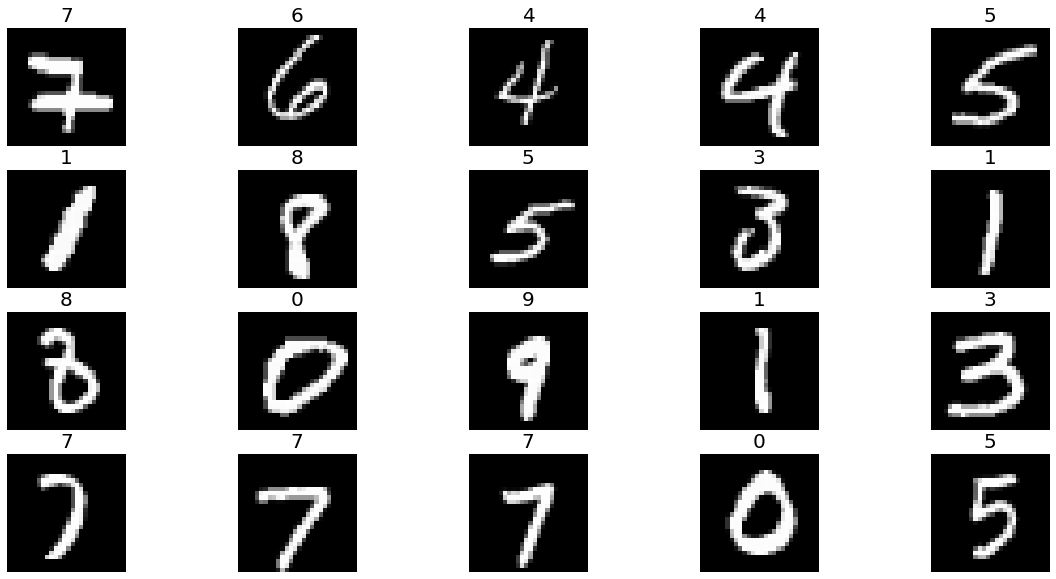

In [5]:
idx = list(np.random.choice(X.shape[0], 20))
plt.figure(figsize=(20,10))
for index, (image, label) in enumerate(zip(X[idx], y[idx])):
    plt.subplot(4, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis("off")
    plt.title(label, fontsize = 20)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=1/7.0, random_state=0)

## Huấn luyện bằng model Logistic Regression trên tập dữ liệu thô ban đầu

In [7]:
start = time.time()
logreg_model = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
end = time.time()

full_logreg_time = end-start
print('Time to fit: {}s'.format(full_logreg_time))

Time to fit: 46.8948860168457s


/home/bao/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
preds_train = logreg_model.predict(X_train)
preds_test = logreg_model.predict(X_test)

# Evaluation
print('Train Error: {} %'.format(np.mean(preds_train != y_train)*100))
print('Test Error: {} %'.format(np.mean(preds_test != y_test)*100))

Train Error: 6.471666666666668 %
Test Error: 8.16 %


## Confusion matrix

In [9]:
pd.crosstab(y_test, preds_test, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,2,3,4,5,6,7,8,9,All
Actual,,,,,,,,,,,
0,968,0,1,1,2,10,8,2,4,0,996
1,0,1115,6,2,1,4,0,4,7,2,1141
2,4,12,933,15,12,1,15,9,35,4,1040
3,1,5,35,892,0,25,3,12,27,13,1013
4,1,2,5,0,898,1,11,10,6,28,962
5,8,2,8,31,9,746,13,5,33,8,863
6,8,3,8,0,11,17,936,2,4,0,989
7,2,5,15,4,11,2,1,980,4,40,1064
8,4,20,11,18,7,28,9,2,854,10,963


## Dùng PCA

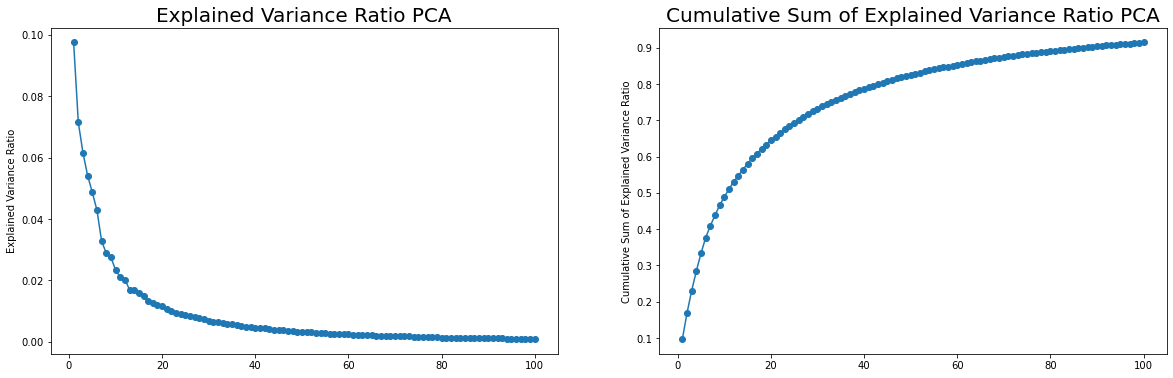

In [10]:
# Do PCA onto our training set and inspect
pca = PCA(n_components=100).fit(X_train)

fig, ax = plt.subplots(ncols=2, figsize=(20,6))
ax1, ax2 = ax.ravel()

ratio = pca.explained_variance_ratio_
ax1.plot(range(1,len(ratio)+1), ratio, 'o-')
ax1.set_title('Explained Variance Ratio PCA', fontsize=20)
ax1.set_ylabel('Explained Variance Ratio')

ratio = pca.explained_variance_ratio_
ax2.plot(range(1,len(ratio)+1), np.cumsum(ratio), 'o-')
ax2.set_title('Cumulative Sum of Explained Variance Ratio PCA', fontsize=20)
ax2.set_ylabel('Cumulative Sum of Explained Variance Ratio');

In [11]:
x_train_pca = pca.transform(X_train)
x_test_pca = pca.transform(X_test)

print(x_train_pca.shape, x_test_pca.shape)

(60000, 100) (10000, 100)


Time to fit model (100 PCs): 10.95413613319397s
Time to fit model (full dataset): 46.8948860168457s


/home/bao/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


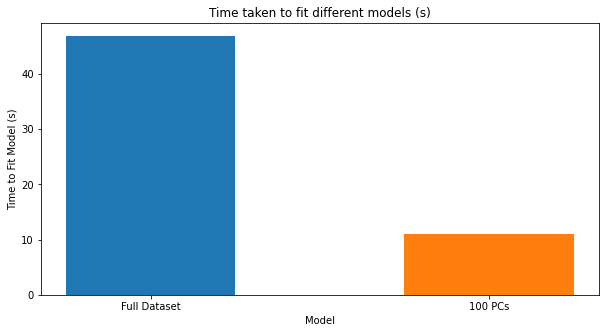

In [12]:
start = time.time()
logreg_model_pca = LogisticRegression(solver='lbfgs').fit(x_train_pca, y_train)
end = time.time()

print('Time to fit model (100 PCs): {}s'.format(end-start))
print('Time to fit model (full dataset): {}s'.format(full_logreg_time))

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(0, full_logreg_time, width=0.5)
ax.bar(1, end-start, width=0.5)
ax.set_xlabel('Model')
ax.set_xticks([0,1])
ax.set_xticklabels(['Full Dataset', '100 PCs'])
ax.set_ylabel('Time to Fit Model (s)')
ax.set_title('Time taken to fit different models (s)');

In [13]:
preds_train_pca = logreg_model_pca.predict(x_train_pca)
preds_test_pca = logreg_model_pca.predict(x_test_pca)

# Evaluation
print('Train Error (100 PCs): {} %'.format(np.mean(preds_train_pca != y_train)*100))
print('Test Error (100 PCs): {} %\n'.format(np.mean(preds_test_pca != y_test)*100))

print('Train Error (full dataset): {} %'.format(np.mean(preds_train != y_train)*100))
print('Test Error (full dataset): {} %'.format(np.mean(preds_test != y_test)*100))

Train Error (100 PCs): 8.316666666666666 %
Test Error (100 PCs): 9.02 %

Train Error (full dataset): 6.471666666666668 %
Test Error (full dataset): 8.16 %


## Confusion matrix

In [14]:
pd.crosstab(y_test, preds_test_pca, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,2,3,4,5,6,7,8,9,All
Actual,,,,,,,,,,,
0,965,0,4,1,5,9,9,1,2,0,996
1,0,1101,7,1,1,6,0,4,18,3,1141
2,7,14,925,16,19,4,12,12,27,4,1040
3,5,10,36,881,1,32,3,12,13,20,1013
4,1,2,6,0,895,1,8,4,5,40,962
5,9,4,10,27,15,737,20,6,23,12,863
6,10,2,2,0,11,13,945,1,5,0,989
7,3,8,17,1,14,2,1,982,3,33,1064
8,2,37,9,26,11,29,10,4,816,19,963


# Tiền xử lý

In [15]:
# Loại bỏ các điểm ảnh ở biên (giá trị 0)
def crop(data):
    data = data.reshape(28,28)
    r = data[~np.all(data == 0, axis=1)] # loại bỏ hàng toàn 0
    idx = np.argwhere(np.all(r[..., :] == 0, axis=0)) # vị trí cột toàn 0
    c = np.delete(r, idx, axis=1) # loại bỏ cột toàn 0
    res = cv2.resize(c, dsize=(28, 28)) # Trả lại về size 28x28
    res = res.flatten() # Chuyển lại thành array 1 chiều như ban đầu
    return res

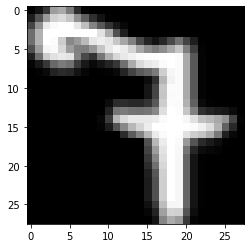

In [16]:
# Xem thử một ảnh sau khi xử lý
data = X_train[0]
res = crop(data)
plt.imshow(res.reshape(28,28), cmap=plt.cm.gray);

In [17]:
X_train_crop = np.apply_along_axis(crop, 1, X_train)
X_test_crop = np.apply_along_axis(crop, 1, X_test)

In [18]:
start = time.time()
logreg_crop_model = LogisticRegression(solver='lbfgs',max_iter= 300).fit(X_train_crop, y_train)
end = time.time()

print('Time to fit model: {}s'.format(end-start))

Time to fit model: 142.83792519569397s


/home/bao/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
preds_train_crop = logreg_crop_model.predict(X_train_crop)
preds_test_crop = logreg_crop_model.predict(X_test_crop)

# Evaluation
print('Train Error (before): {} %'.format(np.mean(preds_train != y_train)*100))
print('Test Error (before): {} %\n'.format(np.mean(preds_test != y_test)*100))

print('Train Error: {} %'.format(np.mean(preds_train_crop != y_train)*100))
print('Test Error: {} %\n'.format(np.mean(preds_test_crop != y_test)*100))

Train Error (before): 6.471666666666668 %
Test Error (before): 8.16 %

Train Error: 5.08 %
Test Error: 7.01 %



## Confusion matrix

In [20]:
pd.crosstab(y_test, preds_test_crop, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,2,3,4,5,6,7,8,9,All
Actual,,,,,,,,,,,
0,961,3,2,3,4,6,6,1,8,2,996
1,4,1085,7,12,6,6,3,4,14,0,1141
2,4,12,965,13,8,6,7,4,19,2,1040
3,5,8,24,919,1,27,0,7,14,8,1013
4,3,7,6,1,902,0,6,5,8,24,962
5,9,5,4,28,1,777,10,6,19,4,863
6,7,4,4,0,6,8,955,0,5,0,989
7,1,2,6,4,9,1,0,1006,9,26,1064
8,3,21,12,19,7,26,5,2,852,16,963


In [21]:
err_X = X_train_crop[preds_train_crop != y_train]
err_y = preds_train_crop[preds_train_crop != y_train]

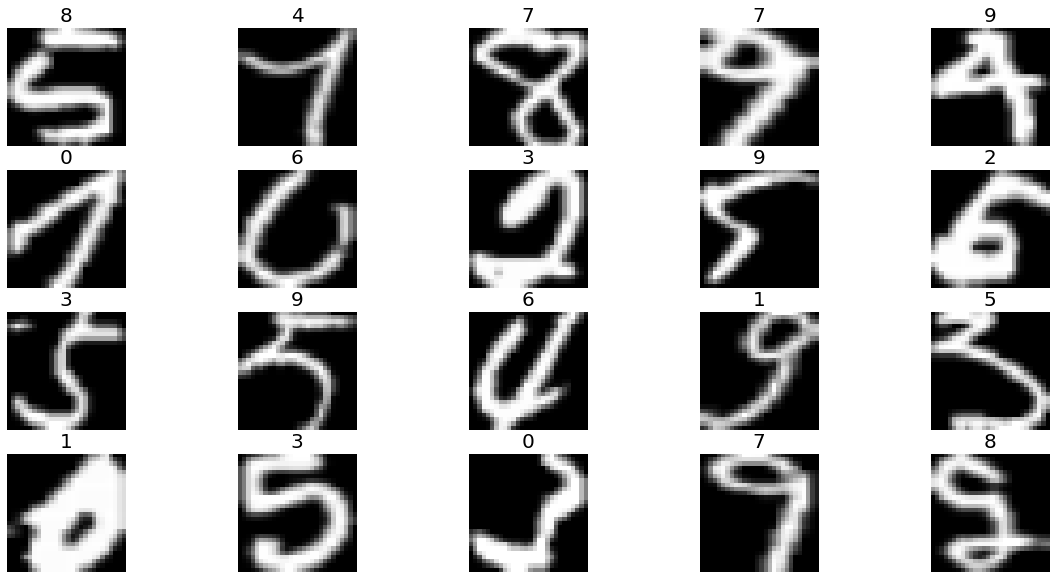

In [22]:
plt.figure(figsize=(20,10))
for index, (image, label) in enumerate(zip(err_X[0:20], err_y[0:20])):
    plt.subplot(4, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis("off")
    plt.title(label, fontsize = 20)

## Thêm tập train bằng cách xoay ảnh

In [23]:
def rotate_left(data):
    res = ndimage.rotate(data.reshape(28,28), 30)
    res = cv2.resize(res, dsize=(28, 28))
    res = res.flatten()
    return res

def rotate_right(data):
    res = ndimage.rotate(data.reshape(28,28), -30)
    res = cv2.resize(res, dsize=(28, 28))
    res = res.flatten()
    return res

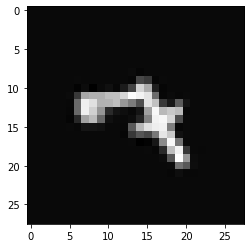

In [24]:
temp = rotate_left(X_train[0])
plt.imshow(temp.reshape(28,28), cmap=plt.cm.gray);

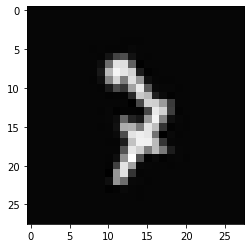

In [25]:
temp = rotate_right(X_train[0])
plt.imshow(temp.reshape(28,28), cmap=plt.cm.gray);

In [26]:
def rotate(data):
    return np.concatenate((data,
                           np.apply_along_axis(rotate_left, 1, data),
                           np.apply_along_axis(rotate_right, 1, data)), axis=0)

In [27]:
def cropData(data):
    return np.apply_along_axis(crop, 1, data)

In [28]:
preprocess_pipeline = make_pipeline(FunctionTransformer(rotate),
                                    FunctionTransformer(cropData),
                                    StandardScaler(),
                                   PCA(n_components=200))

In [29]:
preprocess_pipeline_test = make_pipeline(FunctionTransformer(cropData),
                                         StandardScaler(),
                                         PCA(n_components=200))

In [ ]:
X_train_full = preprocess_pipeline.fit_transform(X_train)
y_train_full = np.concatenate((y_train,y_train,y_train), axis=0)
X_test_full = preprocess_pipeline_test.fit_transform(X_test)

In [ ]:
start = time.time()
model = LogisticRegression(solver='lbfgs',max_iter= 300).fit(X_train_full, y_train_full)
end = time.time()

print('Time to fit model: {}s'.format(end-start))